# Multiple Linear regression : 50 Strat ups

## Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model

In [12]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import OrdinalEncoder
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data
df = pd.read_csv(r'D:\Data science\Assignments\uploaded on github\multiple linear regression\50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

## Encoding to convert categorical column into numerical

In [13]:
# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

In [14]:
# Fit and transform the data
df['State'] = encoder.fit_transform(df[['State']])

In [15]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2.0,192261.83
1,162597.70,151377.59,443898.53,0.0,191792.06
2,153441.51,101145.55,407934.54,1.0,191050.39
3,144372.41,118671.85,383199.62,2.0,182901.99
4,142107.34,91391.77,366168.42,1.0,166187.94


# Data Visualization

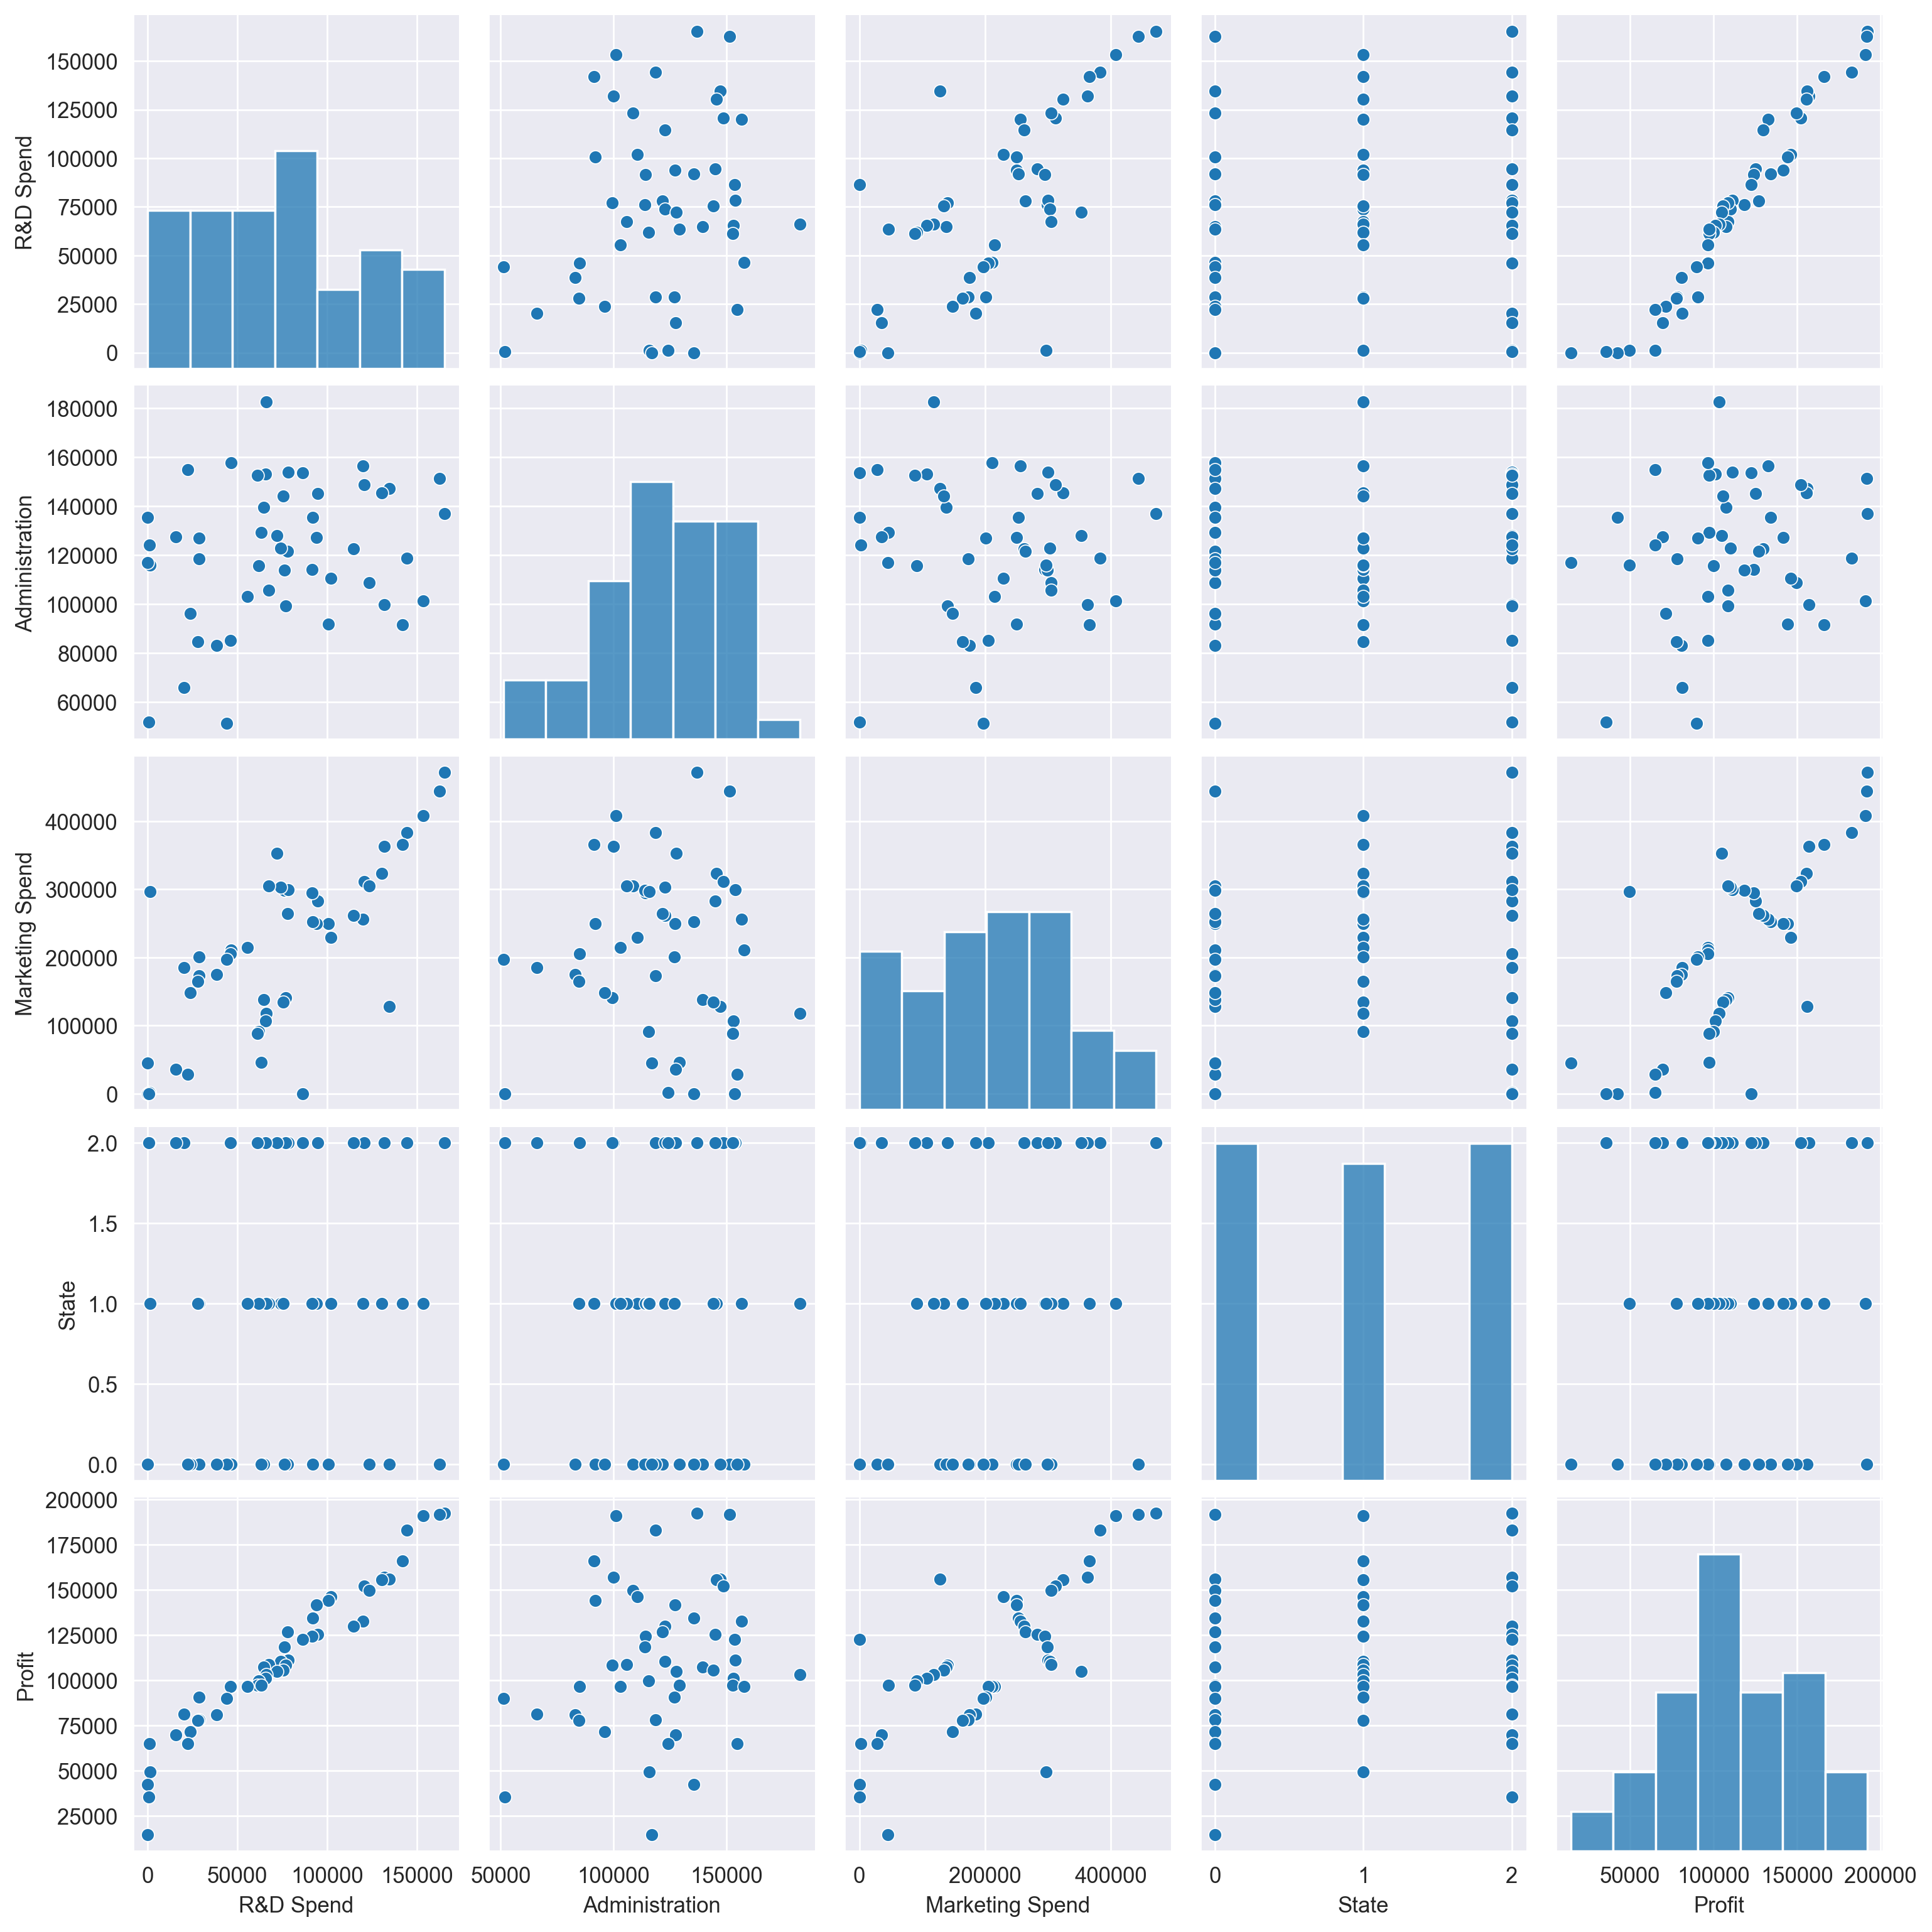

In [16]:
sns.pairplot(df)

<Axes: >

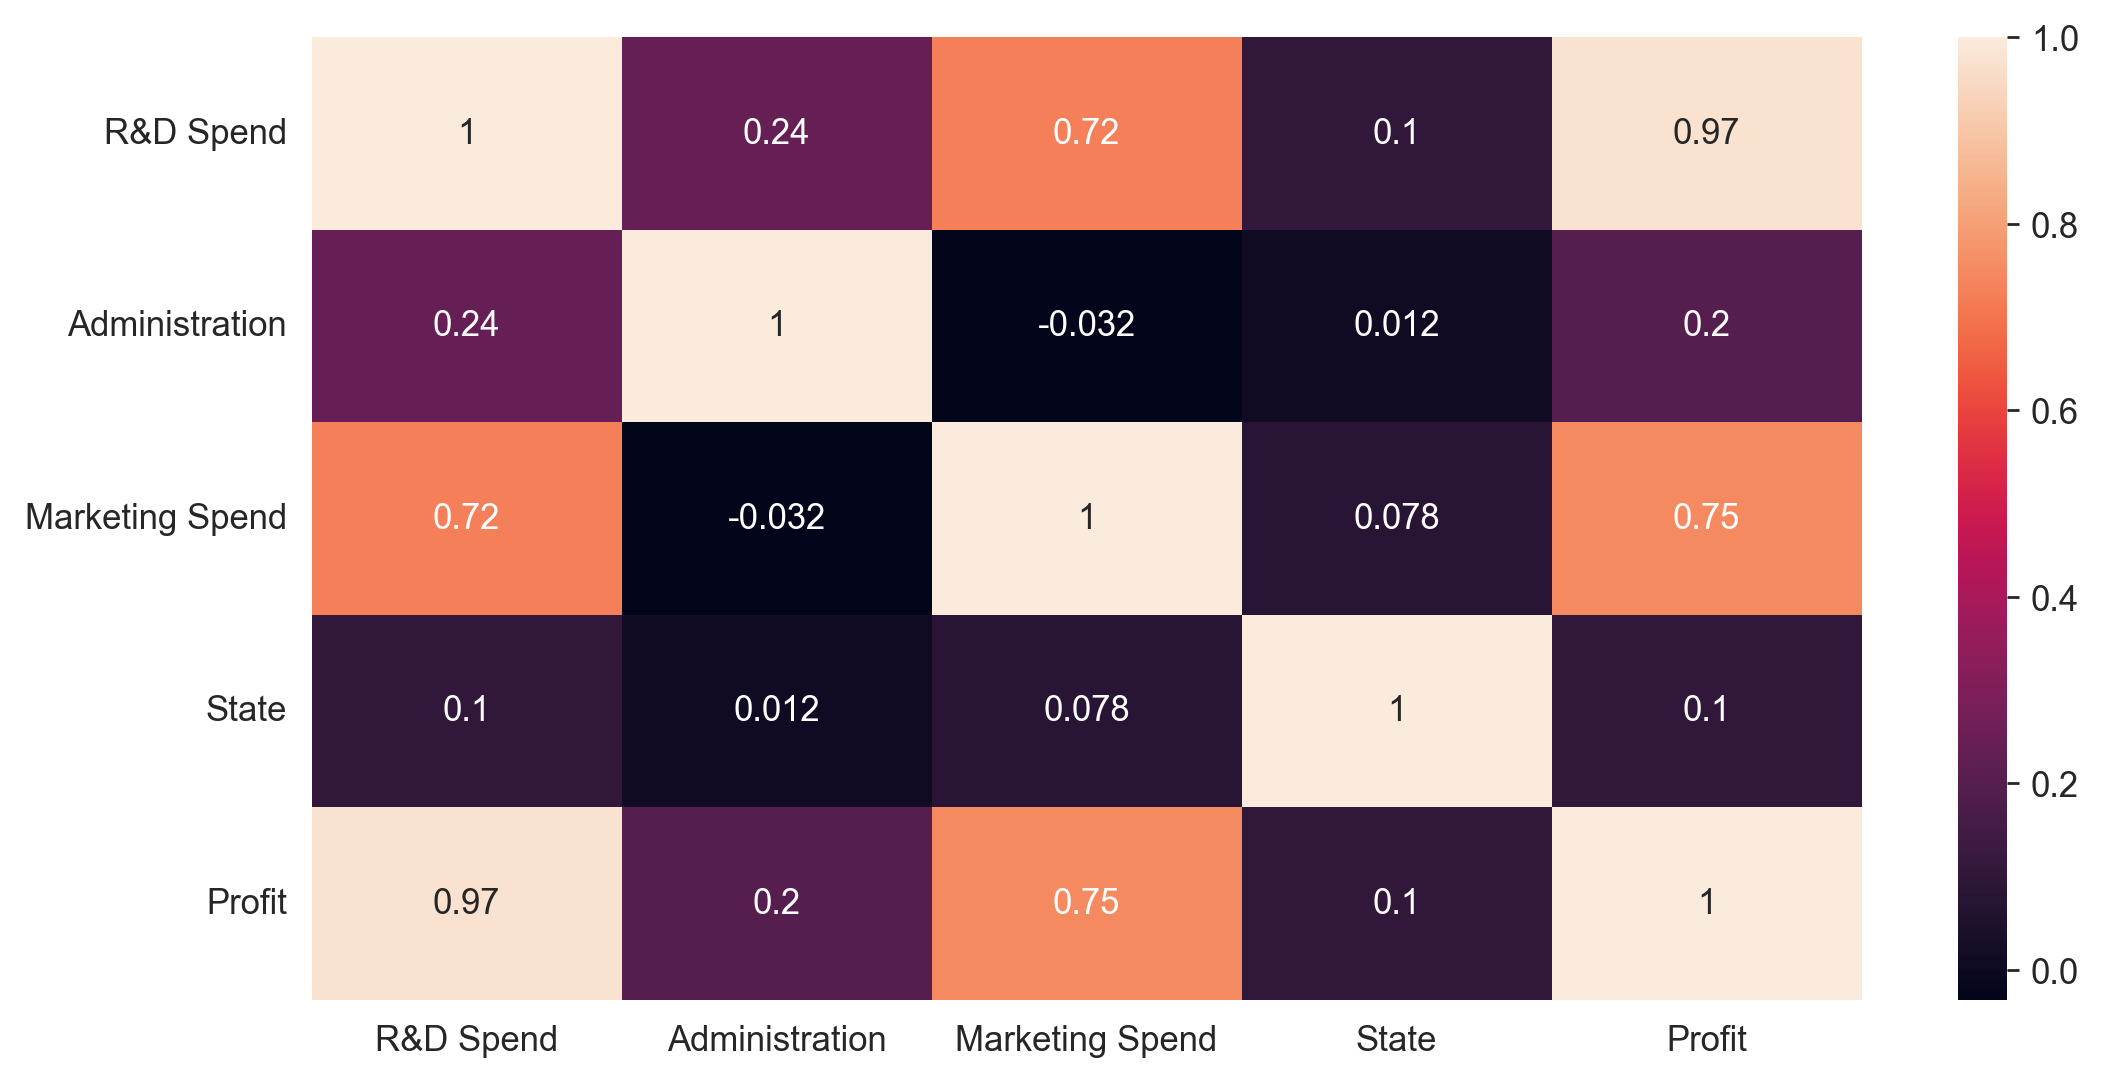

In [17]:
sns.heatmap(df.corr(),annot=True)

# Building Model

In [18]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

## Here  we have to rename the column in order to apply in model 

In [19]:
df.rename(columns={'R&D Spend': 'R&D_Spend', 'Marketing Spend': 'Marketing_Spend'}, inplace=True)

In [26]:
df.rename(columns={'R&D_Spend': 'RandD_Spend'}, inplace=True)

In [27]:
df.columns

Index(['RandD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [28]:
model = smf.ols('Profit~RandD_Spend+Administration+Marketing_Spend+State',data=df).fit()
model

In [29]:
model.rsquared,model.pvalues

(0.9507462044842656,
 Intercept          2.900008e-09
 RandD_Spend        8.249206e-22
 Administration     6.056771e-01
 Marketing_Spend    1.086131e-01
 State              9.889988e-01
 dtype: float64)

# Calculate VIF

In [30]:
data = df.drop(columns=['Profit'])
data

,RandD_Spend,Administration,Marketing_Spend,State
0,165349.20,136897.80,471784.10,2.0
1,162597.70,151377.59,443898.53,0.0
2,153441.51,101145.55,407934.54,1.0
3,144372.41,118671.85,383199.62,2.0
4,142107.34,91391.77,366168.42,1.0
5,131876.90,99814.71,362861.36,2.0
6,134615.46,147198.87,127716.82,0.0
7,130298.13,145530.06,323876.68,1.0
8,120542.52,148718.95,311613.29,2.0
9,123334.88,108679.17,304981.62,0.0


In [31]:
vif = pd.DataFrame()
vif

""


In [34]:
vif['Features'] = data.columns
vif

,VIF,Features
0,8.386322,RandD_Spend
1,4.815916,Administration
2,7.674608,Marketing_Spend
3,2.382637,State


In [32]:
data.values

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 2.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 1.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 2.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 1.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 2.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 1.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 2.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.0498162e+05, 0.0000000e+00],
       [1.0191308e+05, 1.1059411e+05, 2.2916095e+05, 1.0000000e+00],
       [1.0067196e+05, 9.1790610e+04, 2.4974455e+05, 0.0000000e+00],
       [9.3863750e+04, 1.2732038e+05, 2.4983944e+05, 1.0000000e+00],
       [9.1992390e+04, 1.3549507e+05, 2.5266493e+05, 0.0000000e+00],
       [1.1994324e+05, 1.5654742e+

In [35]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
vif

,VIF,Features
0,8.386322,RandD_Spend
1,4.815916,Administration
2,7.674608,Marketing_Spend
3,2.382637,State


# Subset Selection

## AIC

In [ ]:
#from the VIF it RandD_Spend & Marketing_Spend need to consider

In [37]:
#RandD_Spend
RandD_Spend = smf.ols('Profit~RandD_Spend+Administration+State',data=df).fit()
RandD_Spend.rsquared, RandD_Spend.aic

(0.9478132427746072, 1061.663401933727)

In [38]:
#Marketing_Spend

Marketing_Spend = smf.ols('Profit~Marketing_Spend+Administration+State',data=df).fit()
Marketing_Spend.rsquared,Marketing_Spend.aic

(0.6113727245607464, 1162.0529996217995)

# MODEL VALIDATION TECNIQUE

## 1. Residual Analysis

**As per subset selection RandD_Spend has higher r2 and low AIC than Marketing_Spend so we will keep RandD_Spend and drop Marketing_Spend **

In [39]:
Model= smf.ols('Profit~RandD_Spend+Administration+State',data=df).fit()
Model.rsquared,Model.aic

(0.9478132427746072, 1061.663401933727)

In [40]:
model.fittedvalues  ##predicted value

0     192502.764416
1     189182.666045
2     182150.958419
3     173677.490618
4     172142.800630
5     163561.207958
6     158138.912125
7     160023.604155
8     151721.158209
9     154909.306740
10    135510.373518
11    135597.513003
12    129138.878631
13    127510.971265
14    149550.343104
15    146214.627589
16    116937.893898
17    130170.798034
18    129015.068968
19    115613.227991
20    116662.142044
21    117296.983770
22    114706.943173
23    109996.456061
24    113341.039732
25    102259.490409
26    110600.452270
27    114385.558176
28    101659.114598
29    101772.028601
30     99451.953398
31     97664.712734
32     99023.176763
33     97914.373688
34     89060.017061
35     90488.403429
36     75284.111298
37     89641.233032
38     69673.280633
39     83750.156769
40     74836.310639
41     74800.891570
42     70640.771045
43     60142.131192
44     64631.116851
45     47625.138813
46     56162.996236
47     46509.563956
48     49146.573247
49     48234.273495


In [41]:
model.resid  # error value actual (MPG)-predicted (MPG)

0      -240.934416
1      2609.393955
2      8899.431581
3      9224.499382
4     -5954.860630
5     -6570.087958
6     -2016.402125
7     -4271.004155
8       490.611791
9     -5149.346740
10    10611.576482
11     8661.886997
12    12446.641369
13     6796.378735
14   -16947.693104
15   -16297.587589
16    10055.036102
17    -4800.428034
18    -4748.168968
19     7163.632009
20     1811.887956
21    -5983.963770
22    -4354.693173
23    -1262.466061
24    -4788.999732
25     5144.849591
26    -4866.912270
27    -9377.248176
28     1623.265402
29     -767.388601
30      485.636602
31     -181.152734
32    -1595.336763
33    -1135.453688
34     7652.782939
35     5991.106571
36    15424.078702
37      307.906968
38    11555.779367
39    -2744.396769
40     3403.599361
41     2997.938430
42      857.718955
43     9616.848808
44      569.213149
45    17300.941187
46    -6672.246236
47    -3949.833956
48   -13473.163247
49   -33552.873495
dtype: float64

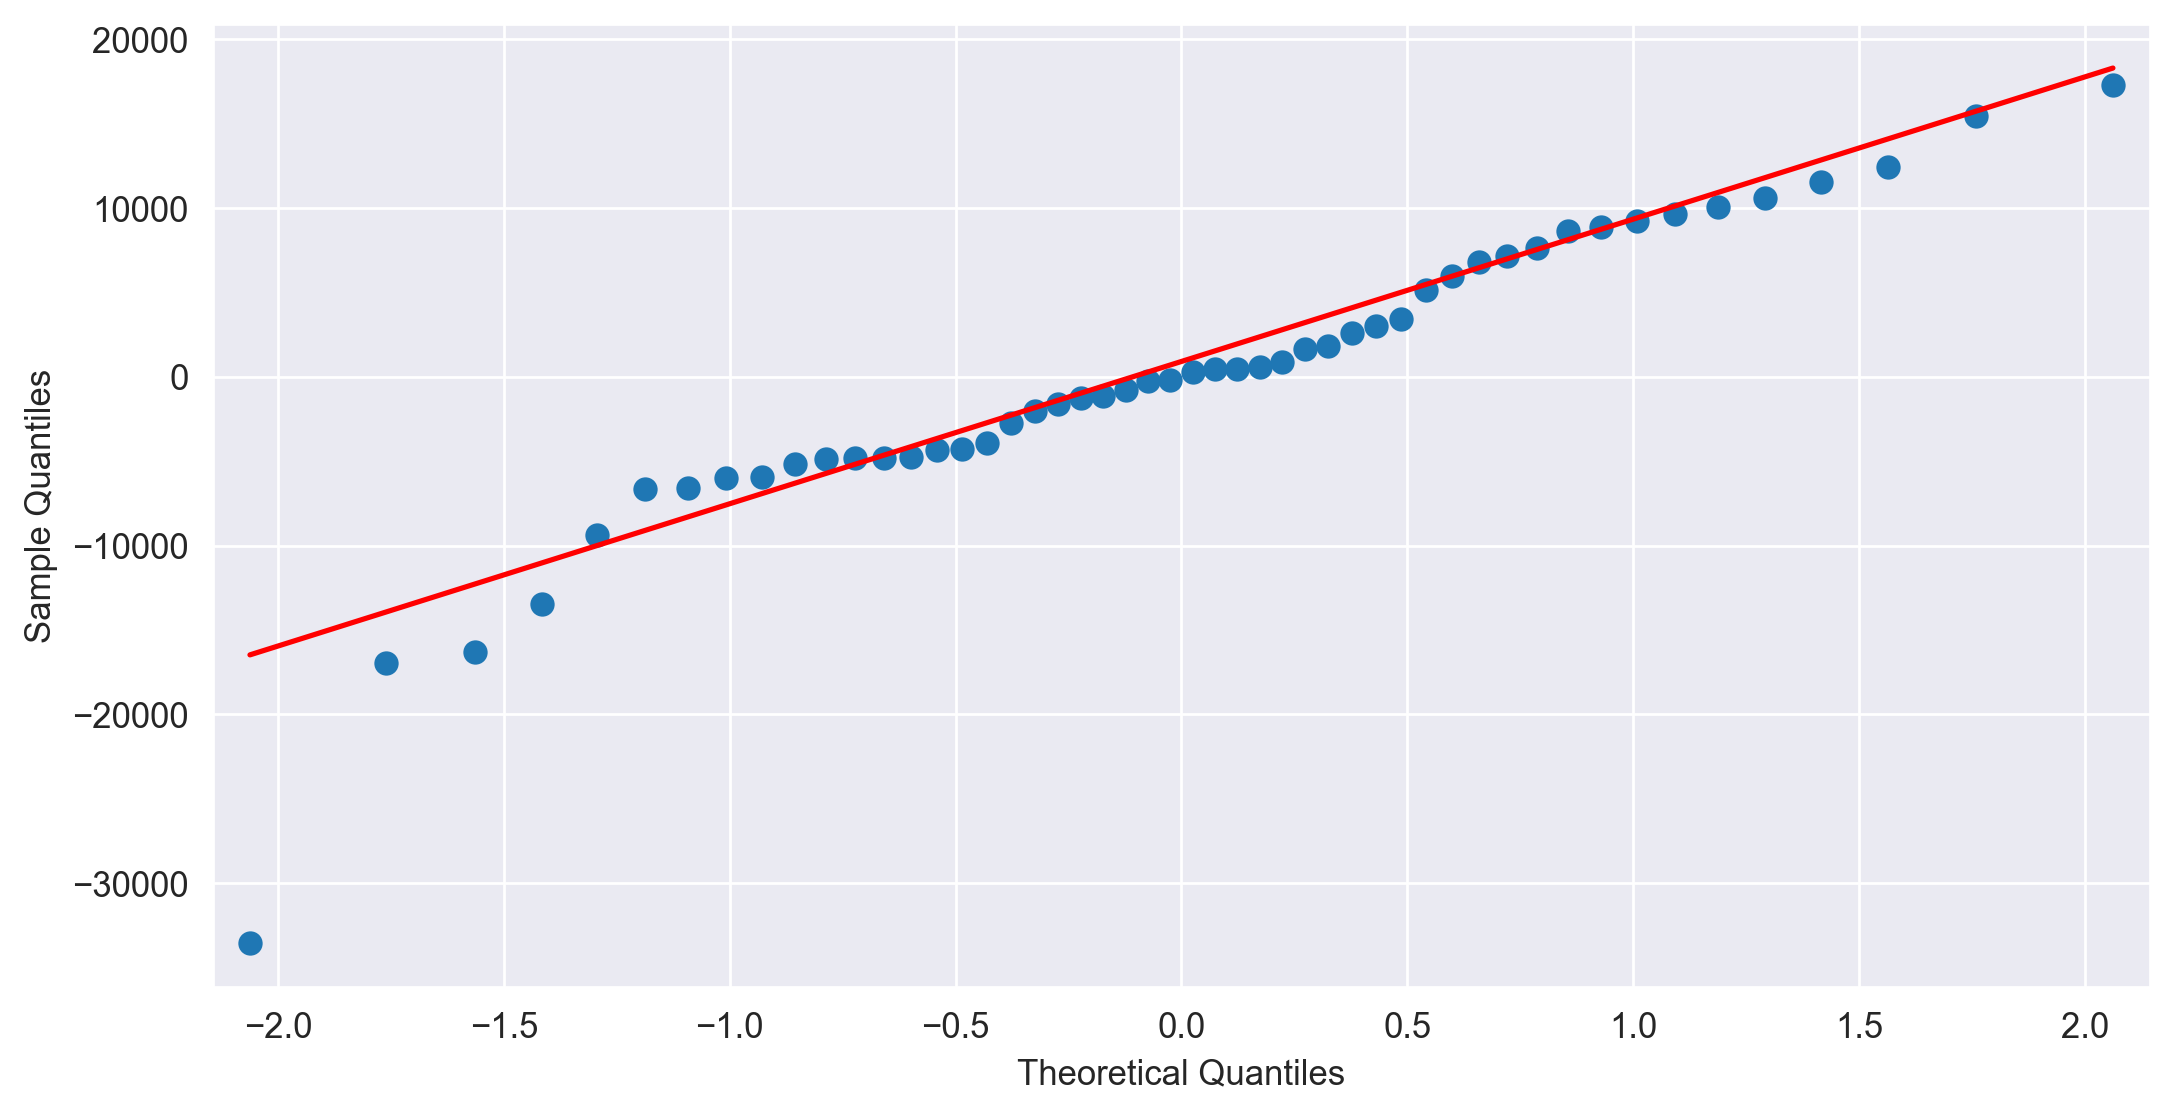

In [42]:
#Q-Q plot
sm.qqplot(model.resid, line = 'q');  # to print red quantile solid line line =q is required

## Get index for higher residuals

In [43]:
np.argmax(model.resid), np.max(model.resid) #argmax gives index number of recorde where error is max,and max
#function give maximum value

(45, 17300.94118701163)

# 2. Residual plot of Homoscedasticity

## Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals.

In [46]:
model.params

Intercept          50142.506443
RandD_Spend            0.805760
Administration        -0.026826
Marketing_Spend        0.027228
State                -22.320577
dtype: float64

In [45]:
model.fittedvalues

0     192502.764416
1     189182.666045
2     182150.958419
3     173677.490618
4     172142.800630
5     163561.207958
6     158138.912125
7     160023.604155
8     151721.158209
9     154909.306740
10    135510.373518
11    135597.513003
12    129138.878631
13    127510.971265
14    149550.343104
15    146214.627589
16    116937.893898
17    130170.798034
18    129015.068968
19    115613.227991
20    116662.142044
21    117296.983770
22    114706.943173
23    109996.456061
24    113341.039732
25    102259.490409
26    110600.452270
27    114385.558176
28    101659.114598
29    101772.028601
30     99451.953398
31     97664.712734
32     99023.176763
33     97914.373688
34     89060.017061
35     90488.403429
36     75284.111298
37     89641.233032
38     69673.280633
39     83750.156769
40     74836.310639
41     74800.891570
42     70640.771045
43     60142.131192
44     64631.116851
45     47625.138813
46     56162.996236
47     46509.563956
48     49146.573247
49     48234.273495


In [44]:
model.resid

0      -240.934416
1      2609.393955
2      8899.431581
3      9224.499382
4     -5954.860630
5     -6570.087958
6     -2016.402125
7     -4271.004155
8       490.611791
9     -5149.346740
10    10611.576482
11     8661.886997
12    12446.641369
13     6796.378735
14   -16947.693104
15   -16297.587589
16    10055.036102
17    -4800.428034
18    -4748.168968
19     7163.632009
20     1811.887956
21    -5983.963770
22    -4354.693173
23    -1262.466061
24    -4788.999732
25     5144.849591
26    -4866.912270
27    -9377.248176
28     1623.265402
29     -767.388601
30      485.636602
31     -181.152734
32    -1595.336763
33    -1135.453688
34     7652.782939
35     5991.106571
36    15424.078702
37      307.906968
38    11555.779367
39    -2744.396769
40     3403.599361
41     2997.938430
42      857.718955
43     9616.848808
44      569.213149
45    17300.941187
46    -6672.246236
47    -3949.833956
48   -13473.163247
49   -33552.873495
dtype: float64

Text(0, 0.5, 'Errors')

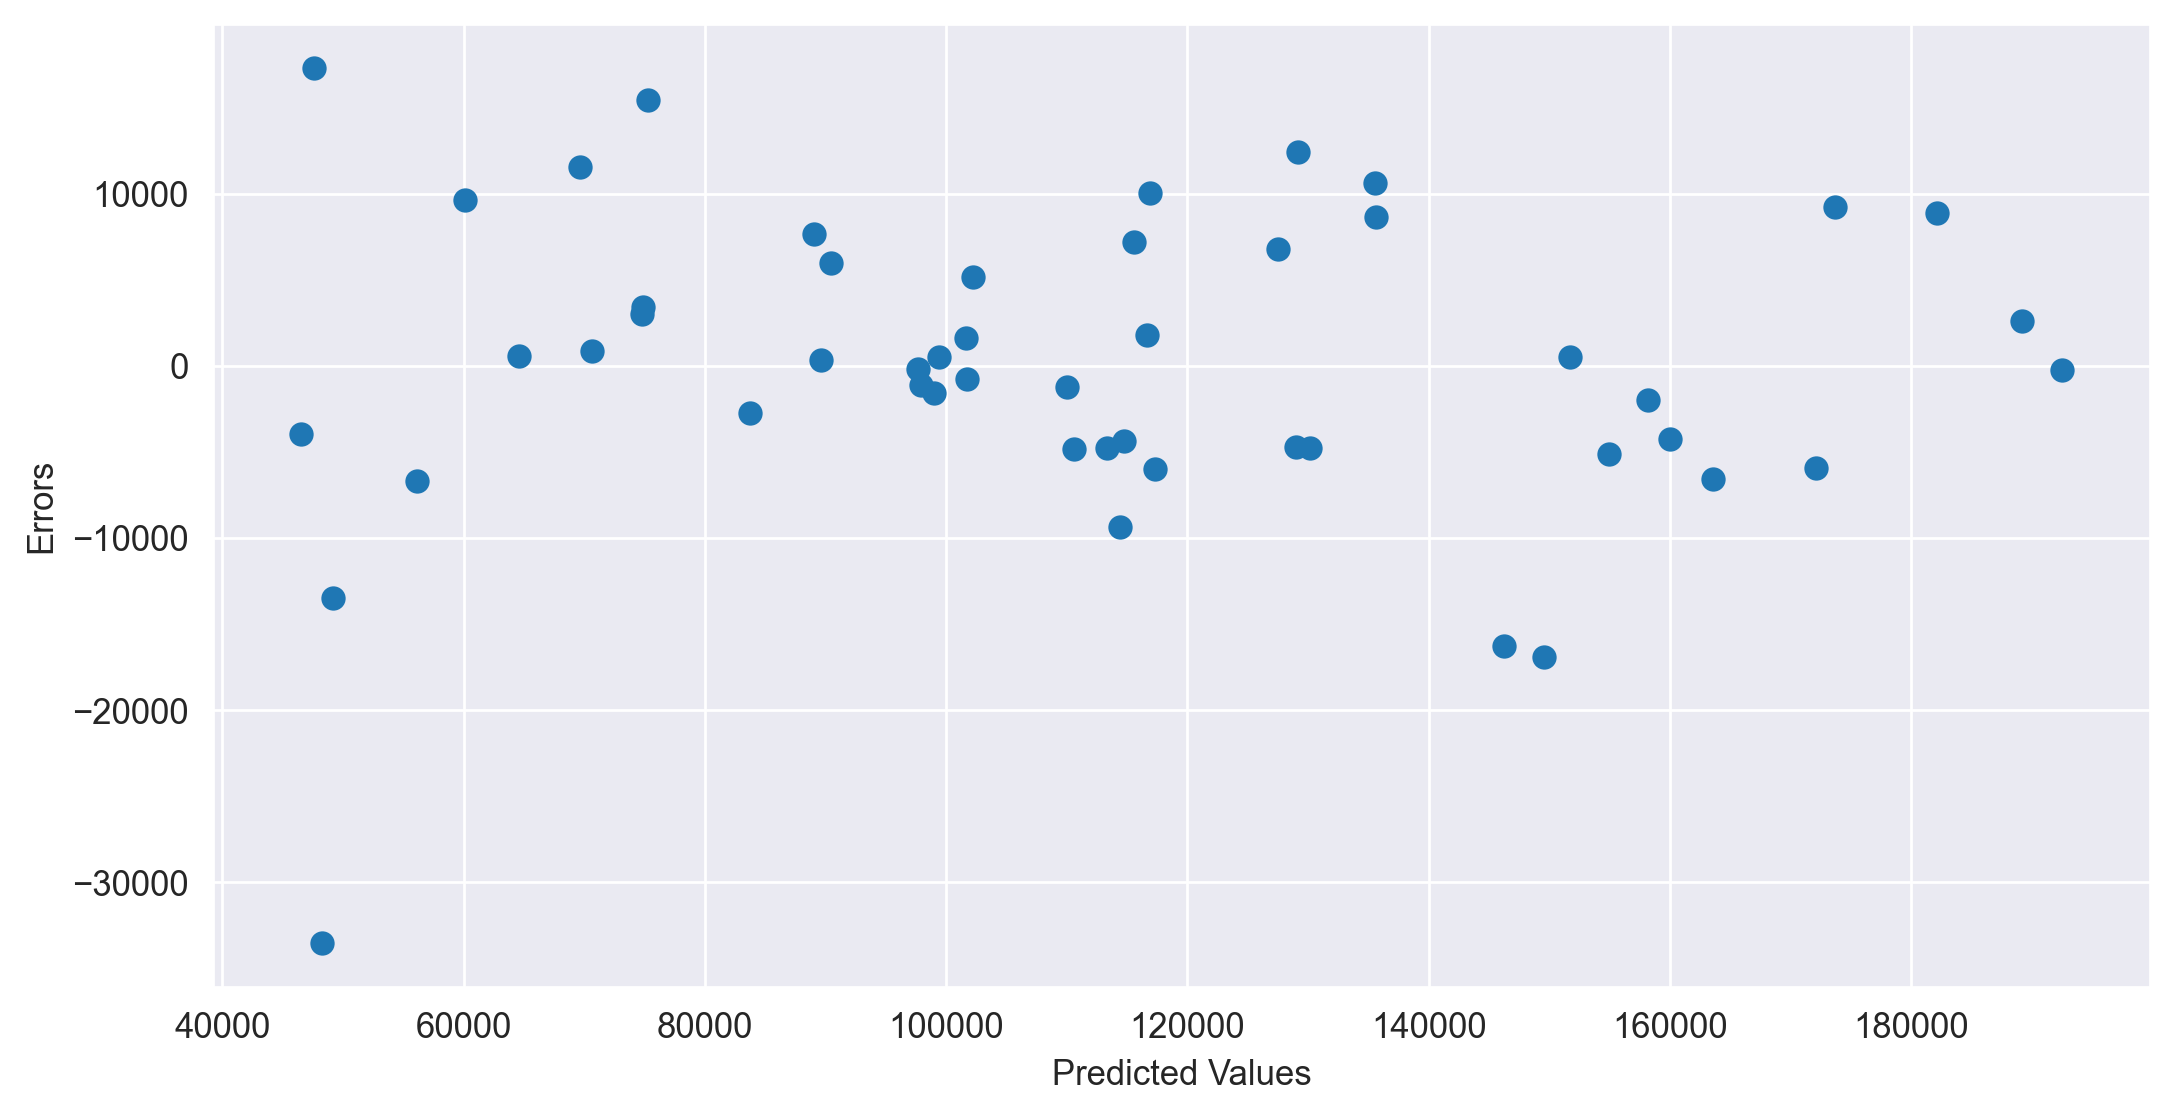

In [47]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')

# 3.Residual VS Regressor

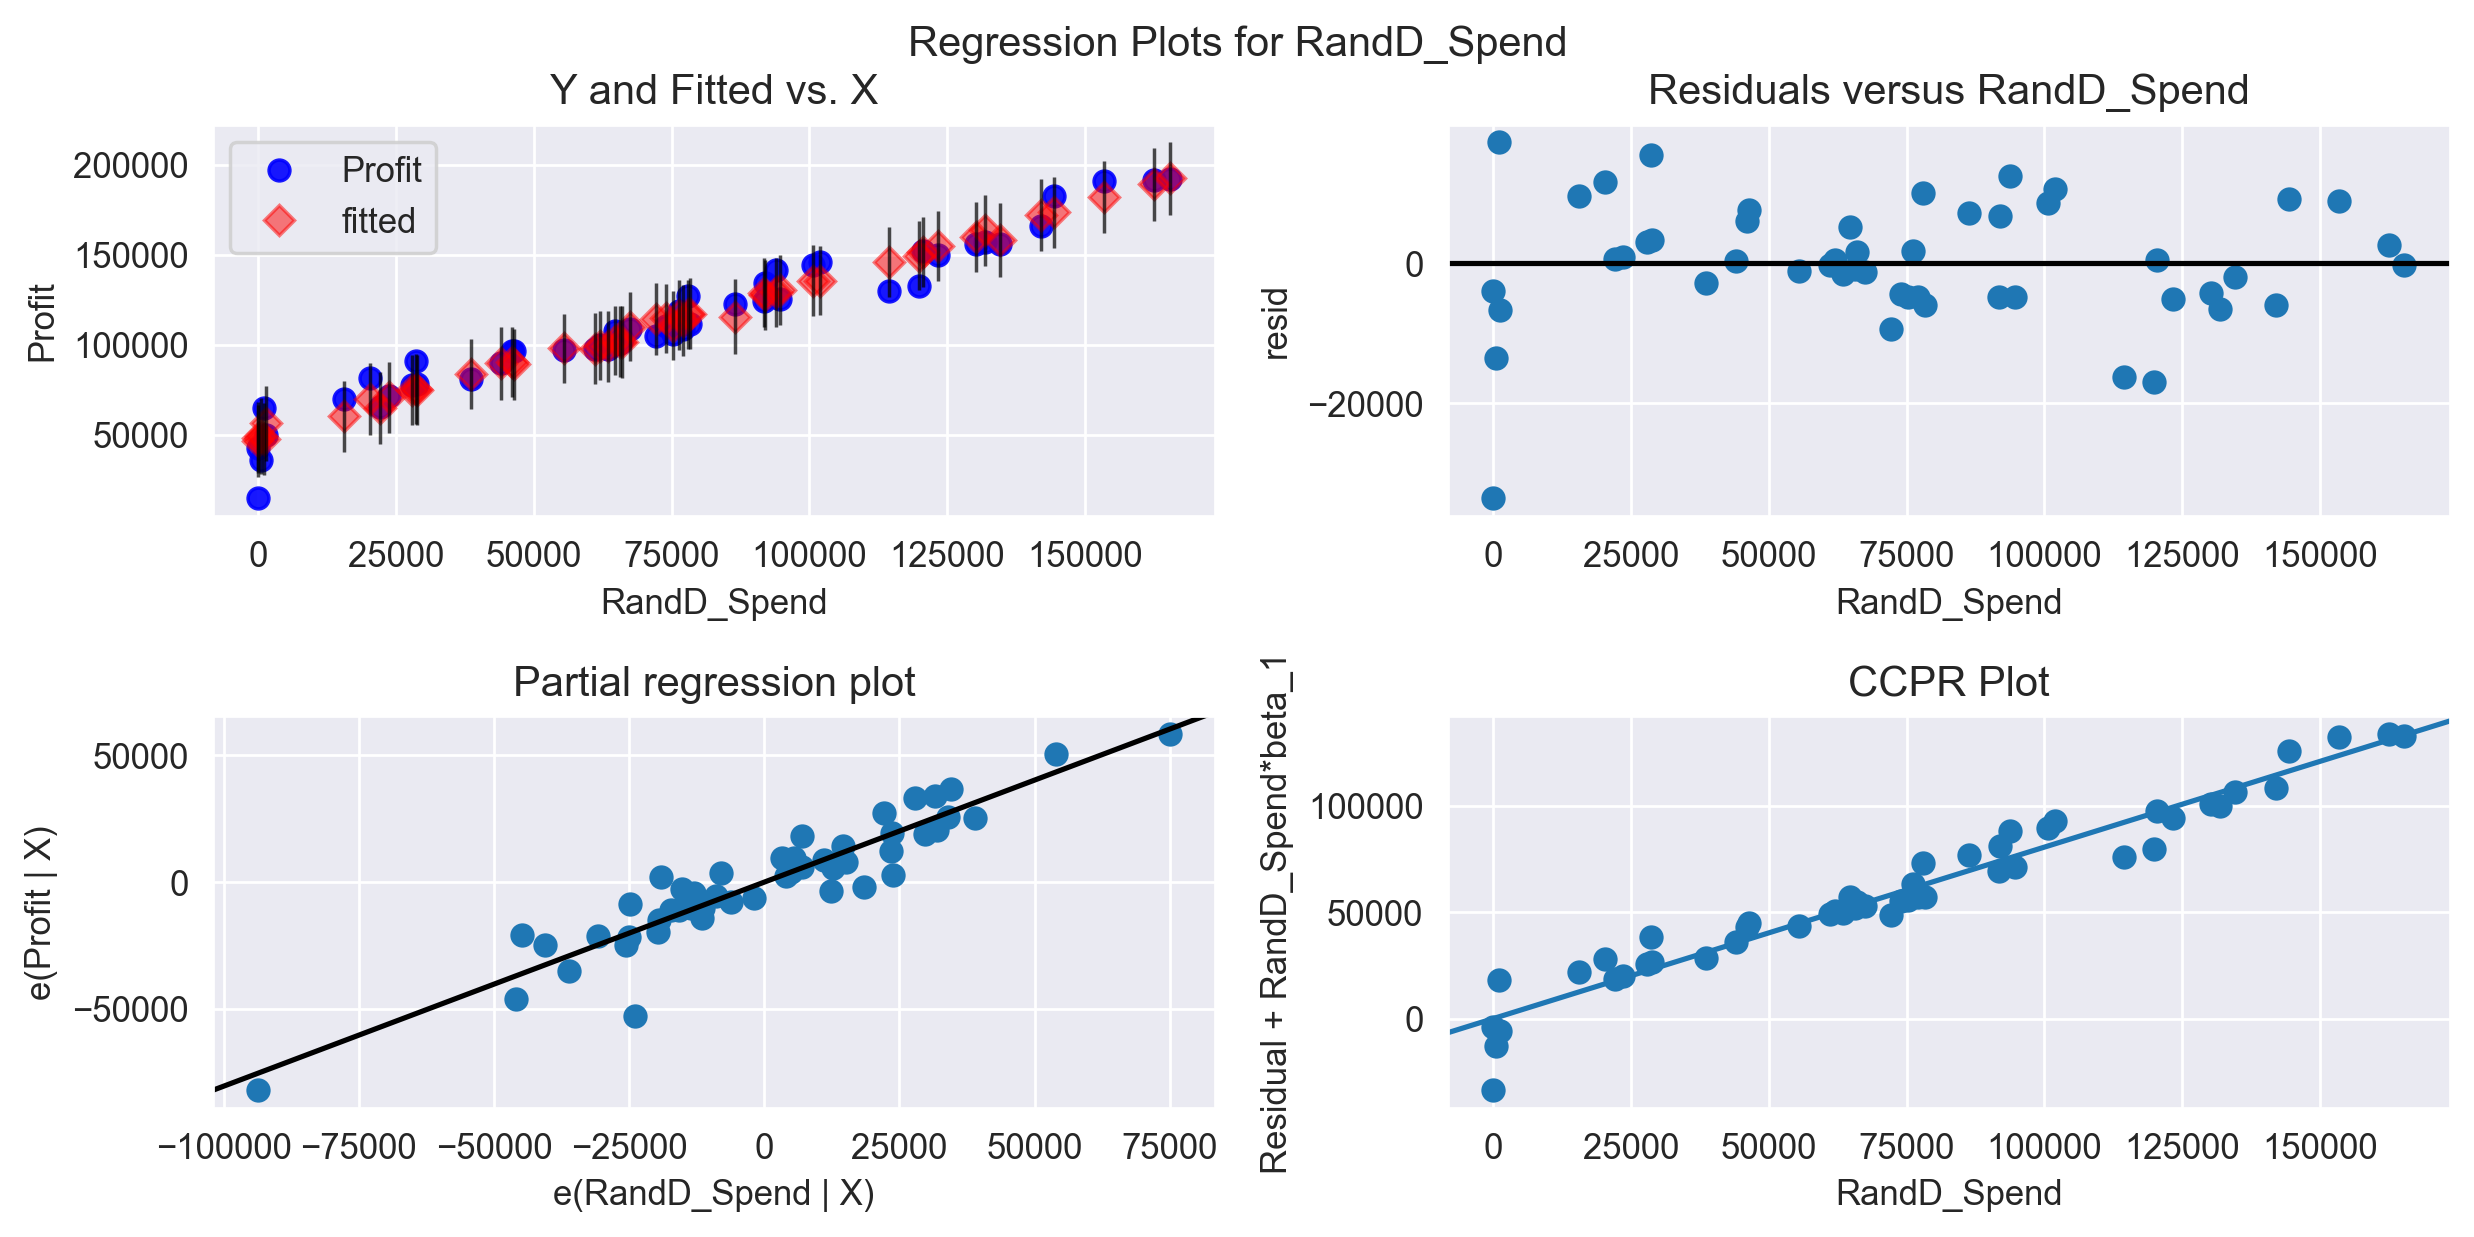

In [48]:
#RandD_Spend
sm.graphics.plot_regress_exog(model,'RandD_Spend');

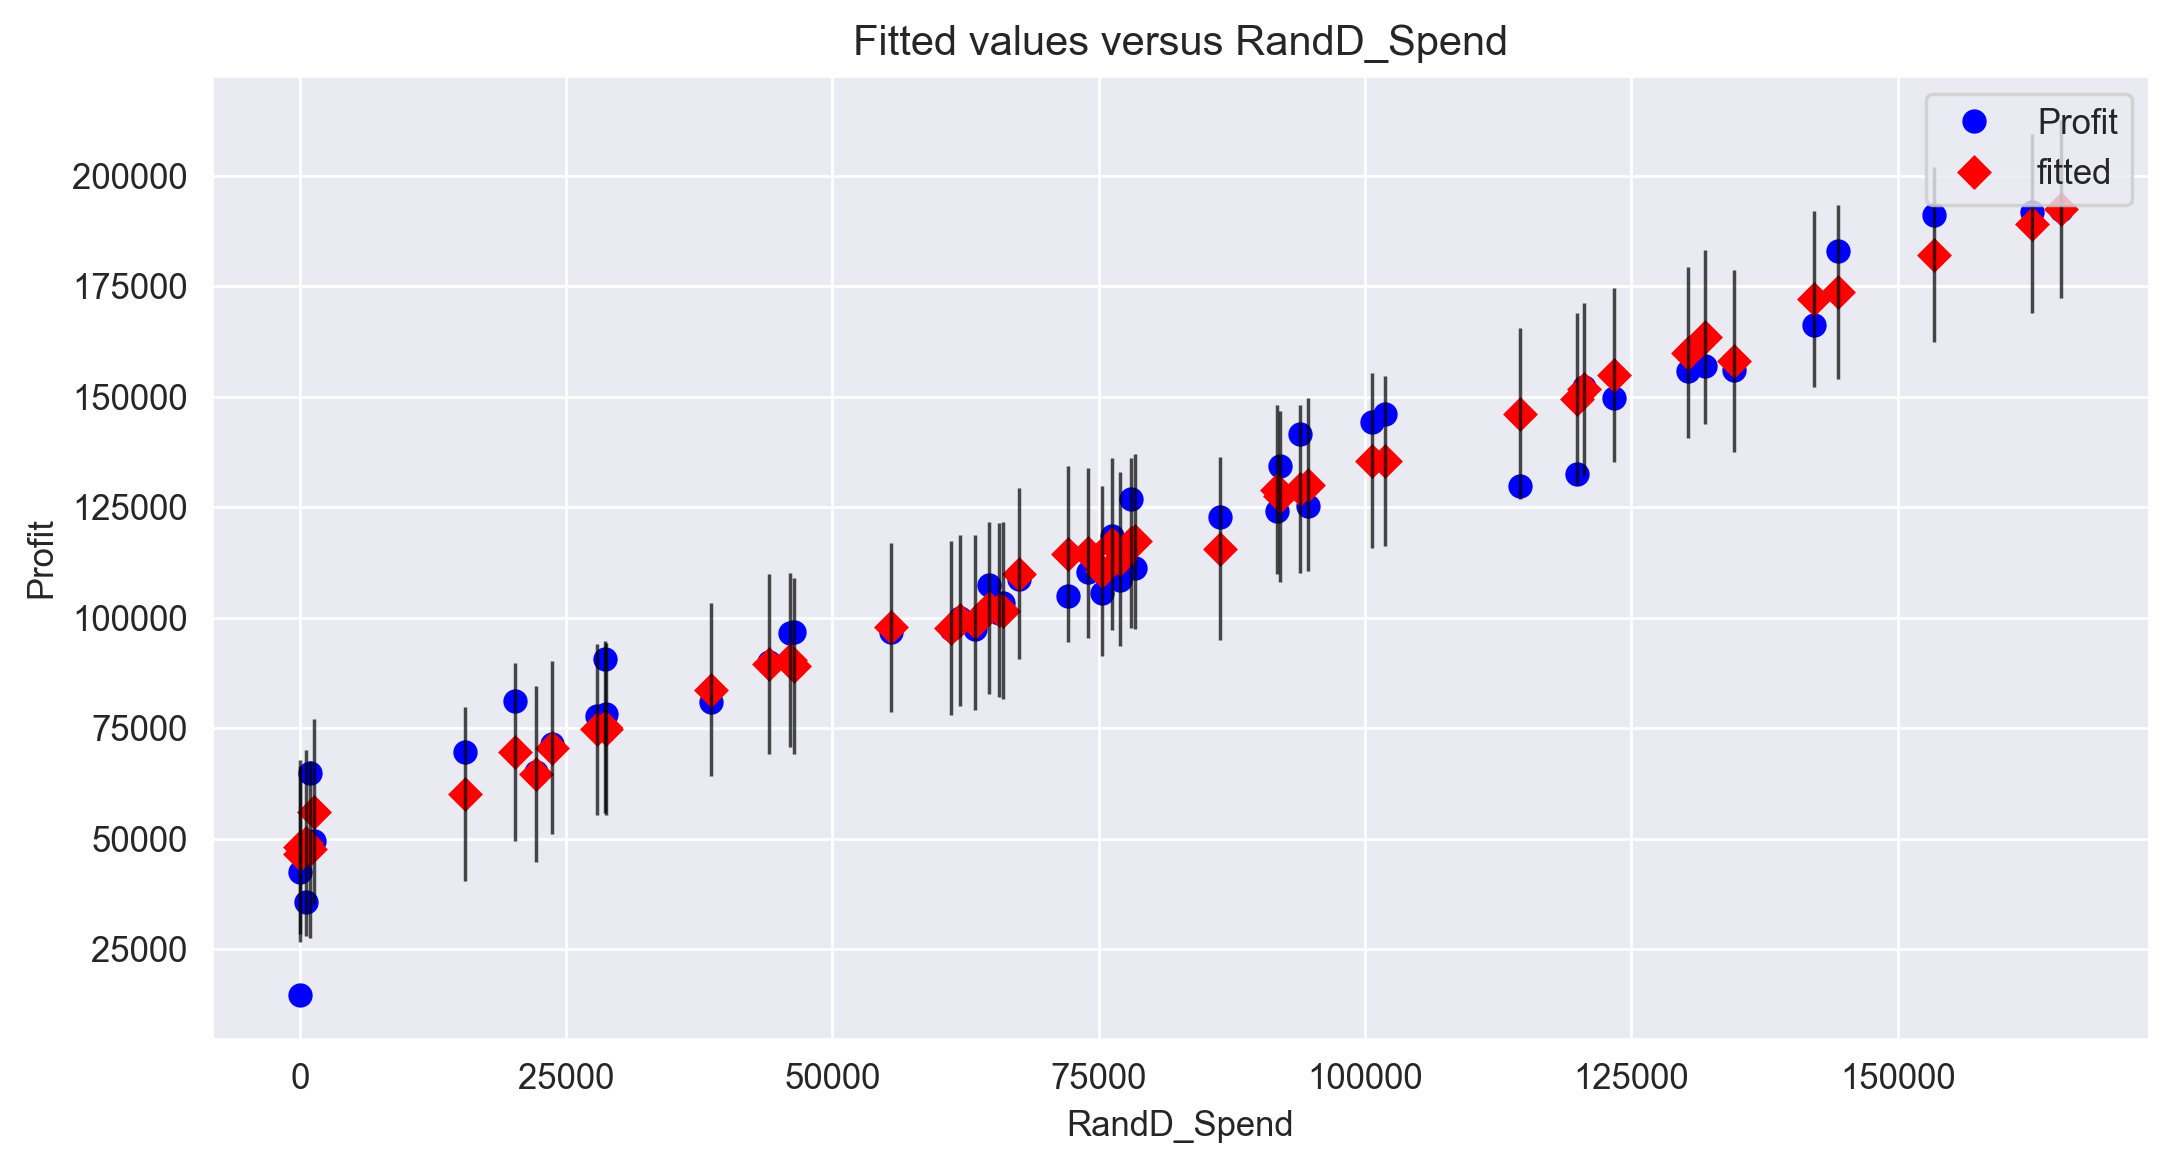

In [49]:
sm.graphics.plot_fit(model,'RandD_Spend');

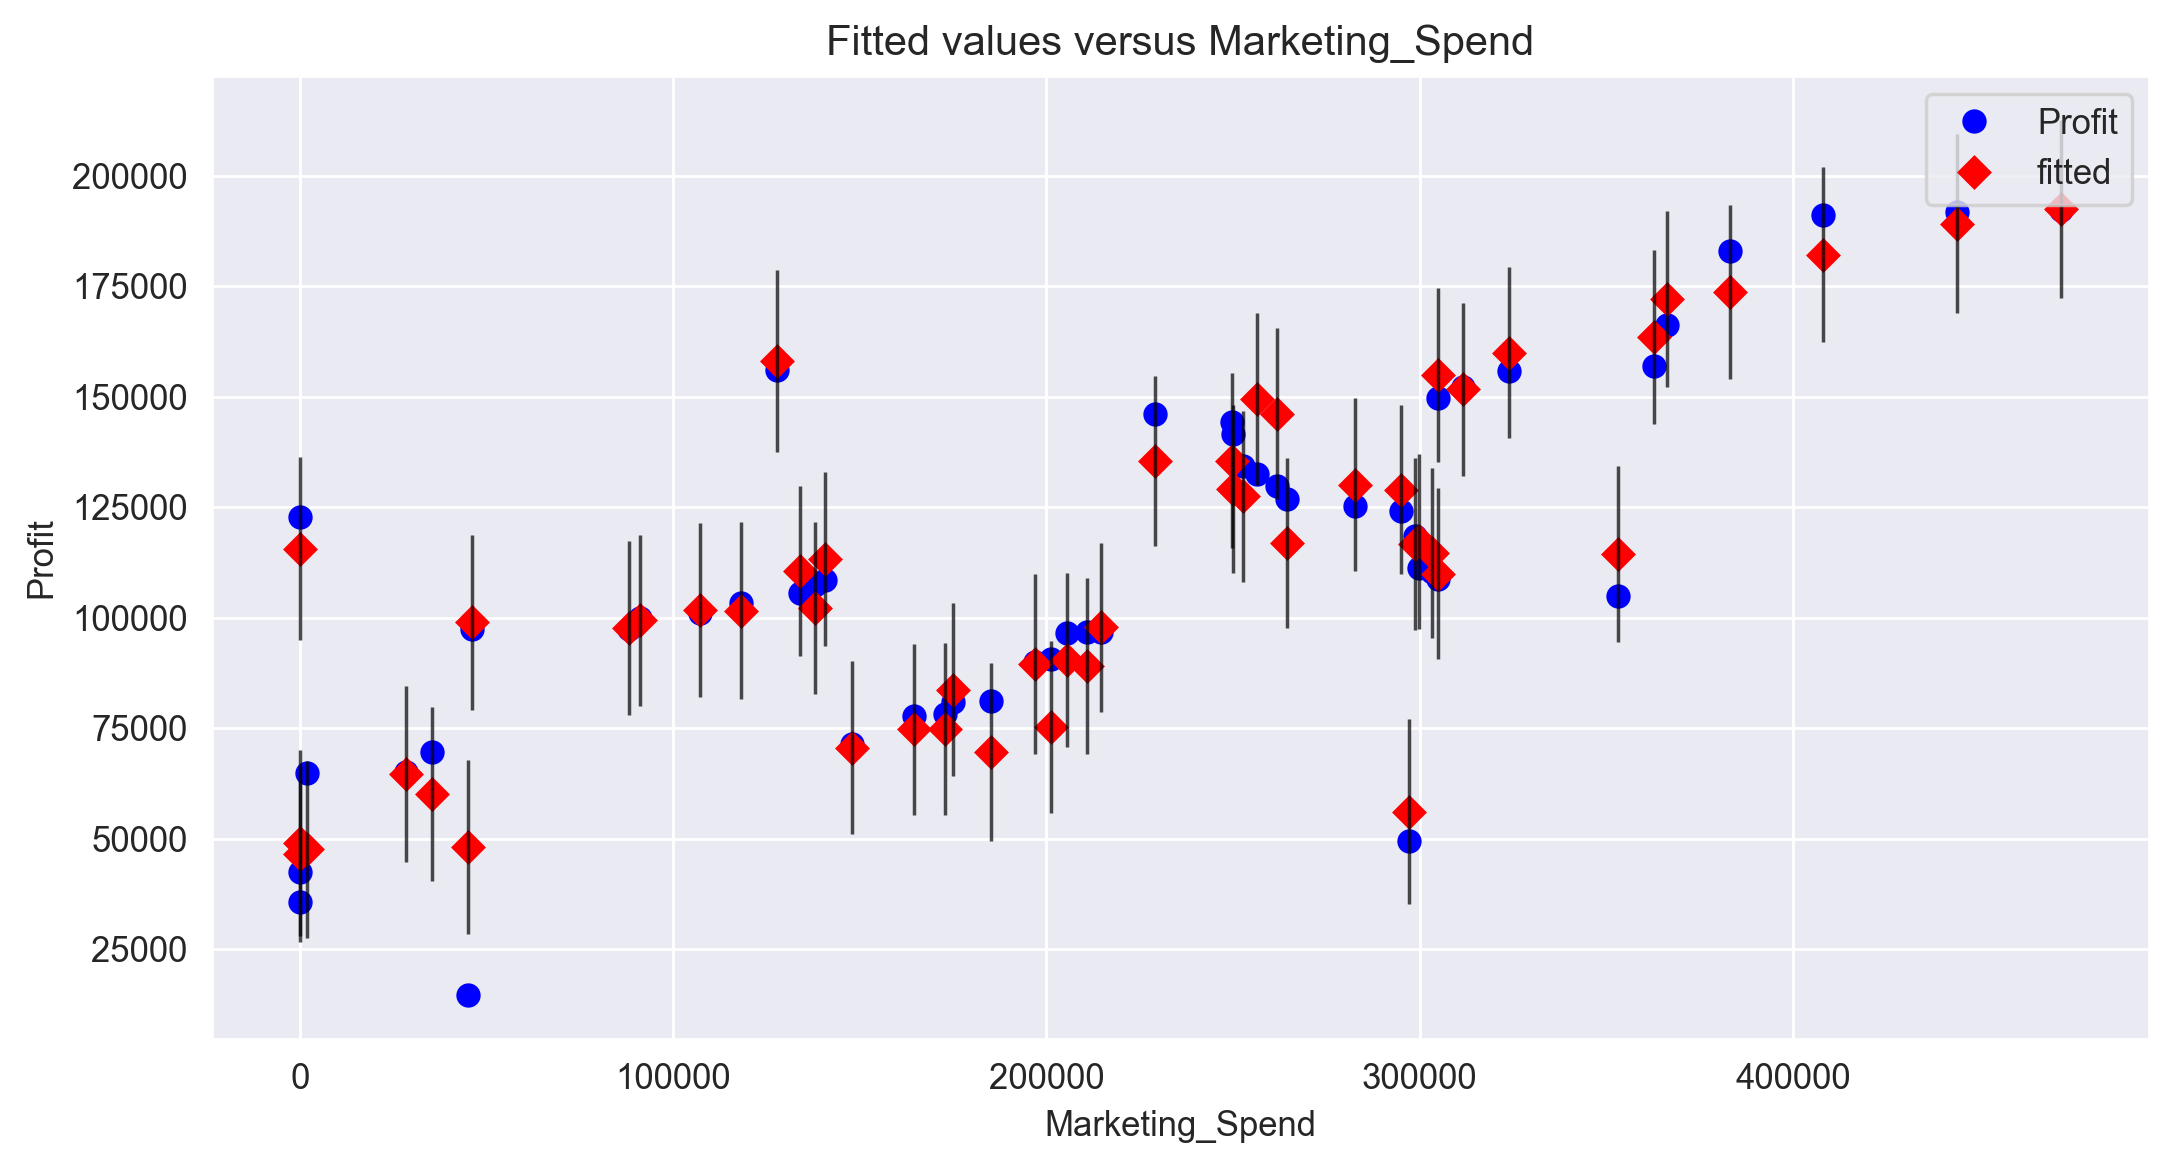

In [50]:
#Marketing_Spend
sm.graphics.plot_fit(model,'Marketing_Spend');

# MODEL DELETION TECHNIQUES

## Cook's Distance

### Detecting influencers and outliers

In [51]:
model

In [52]:
#Find the influence data
inf = model.get_influence()

#Calculate the cooks distance
c,p = inf.cooks_distance

In [53]:
c

array([2.64962564e-05, 3.65460668e-03, 2.55553863e-02, 2.31878065e-02,
       1.14302043e-02, 1.23884179e-02, 3.11121982e-03, 2.80901852e-03,
       5.28558551e-05, 6.83388587e-03, 1.18531743e-02, 2.08698178e-02,
       9.05518079e-03, 7.11076506e-03, 4.81255370e-02, 4.55550364e-02,
       1.47917331e-02, 4.44019365e-03, 1.69993736e-03, 3.99363634e-02,
       6.08628041e-04, 1.22997651e-02, 2.28337576e-03, 2.15977000e-04,
       6.00485777e-03, 4.43262172e-03, 2.67612080e-03, 3.28473798e-02,
       1.03151489e-03, 1.51104626e-04, 3.28164666e-05, 9.07970048e-06,
       8.17741552e-04, 1.00239191e-04, 2.18081482e-02, 8.84928027e-03,
       4.36551851e-02, 5.68744297e-05, 6.25167081e-02, 1.85525357e-03,
       2.27307299e-03, 1.55244650e-03, 1.56379369e-04, 2.73167923e-02,
       1.17346160e-04, 1.12202649e-01, 4.28134712e-02, 5.41565252e-03,
       1.91163485e-01, 3.06028195e-01])

Text(0, 0.5, 'Cooks Distance')

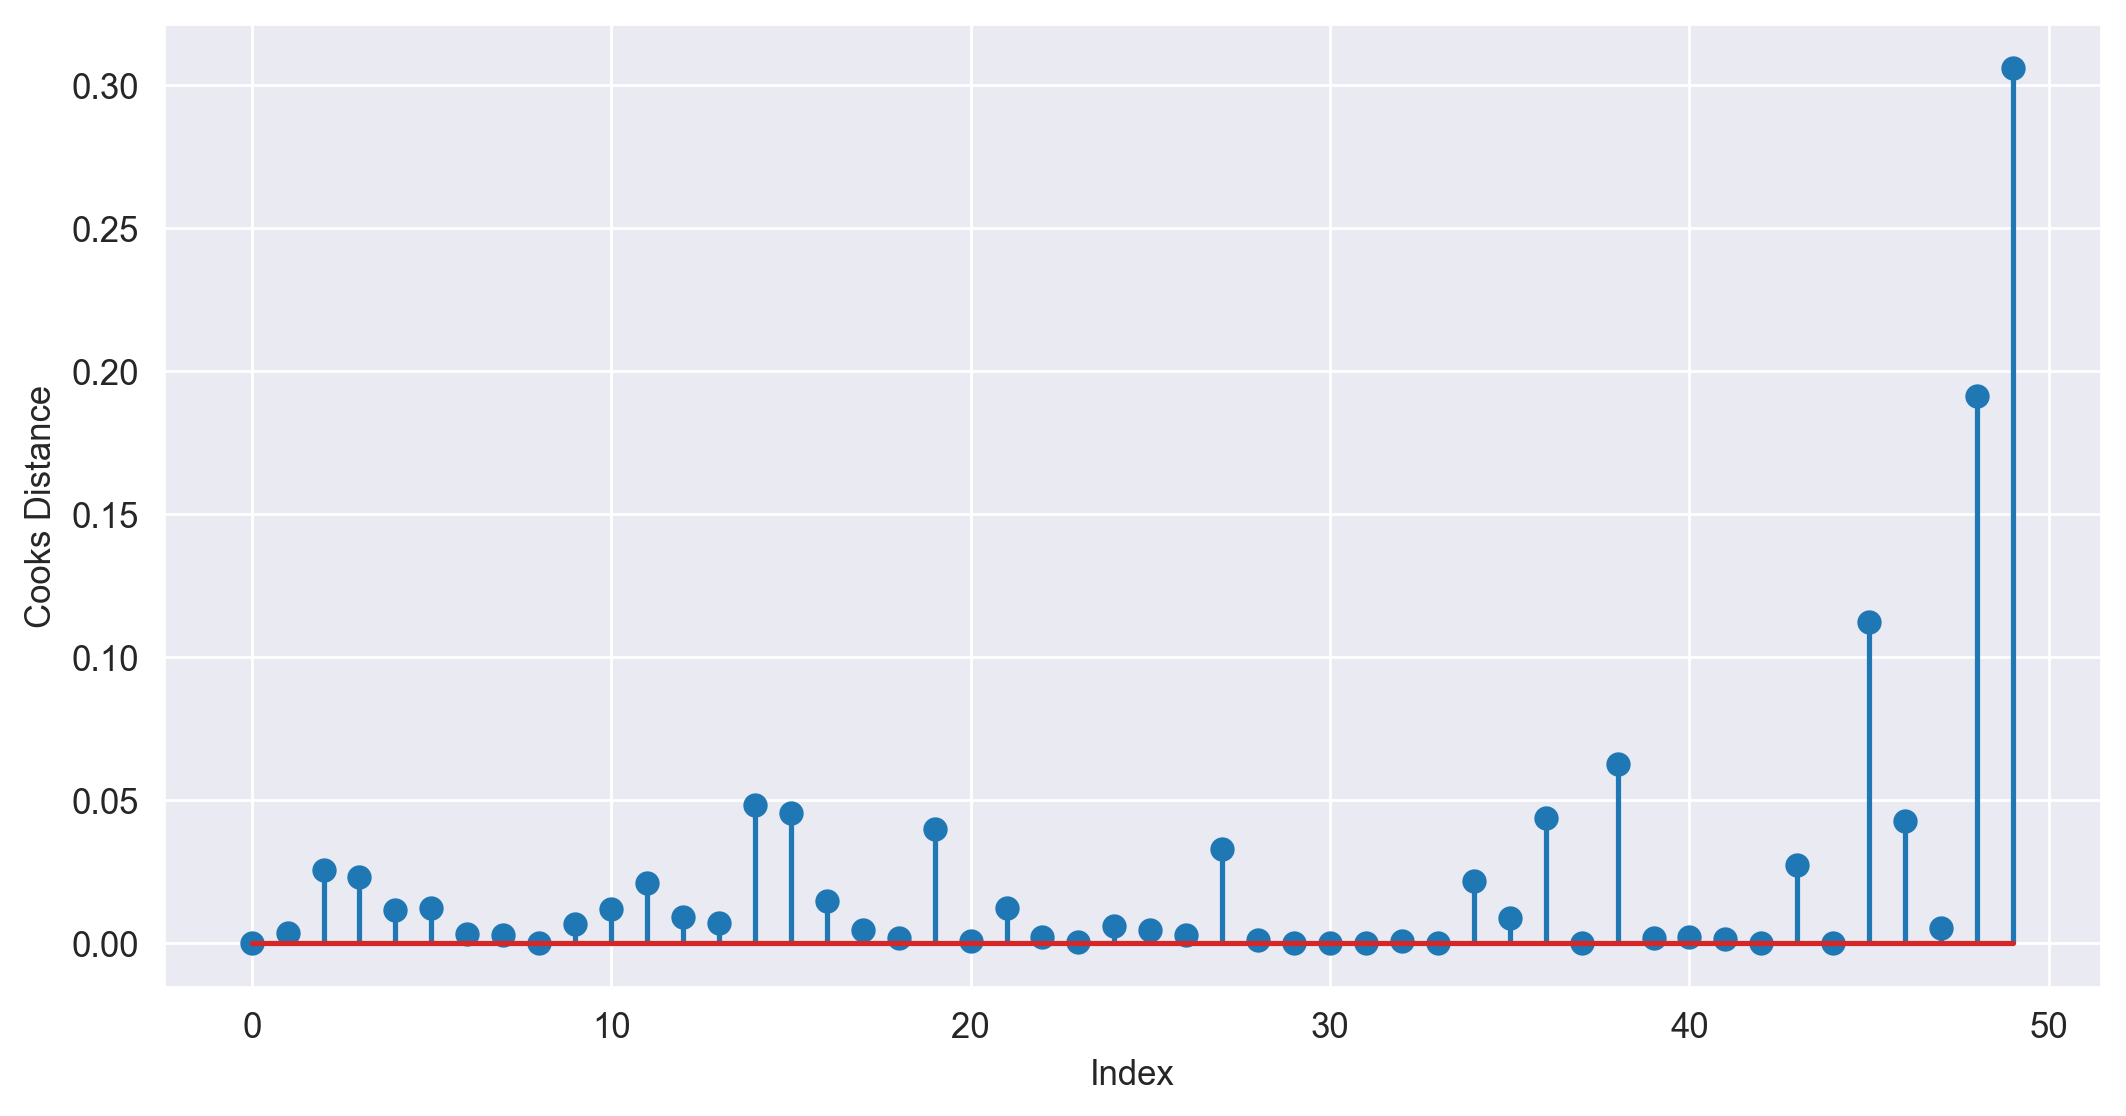

In [54]:
# Cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

In [55]:
np.argmax(c), np.max(c)

(49, 0.3060281954699341)

In [56]:
df.iloc[[49]]  ##[[]] give in tabular format

,RandD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,0.0,14681.4


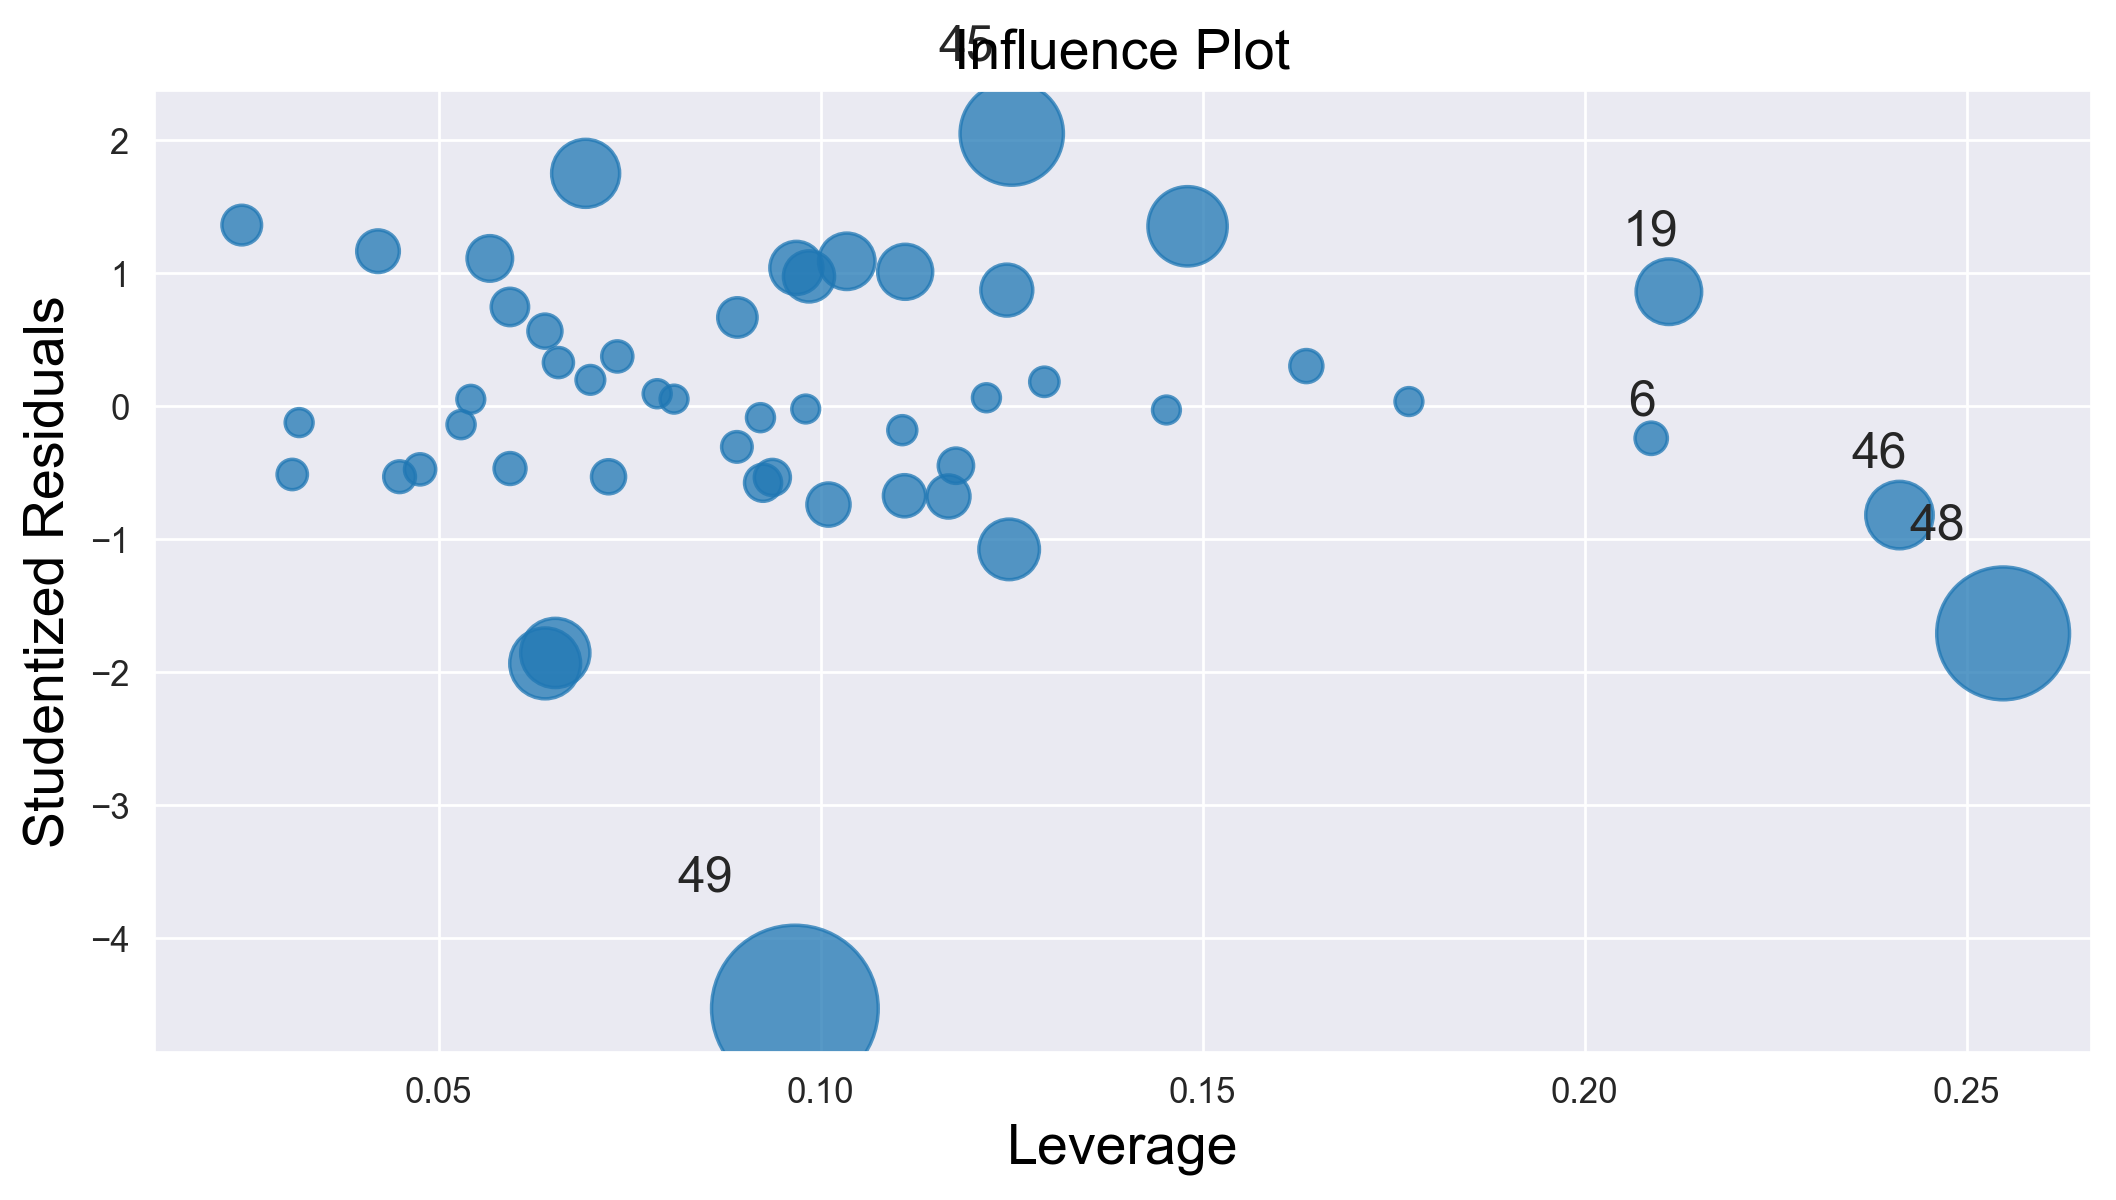

In [57]:
influence_plot(model);

In [58]:
#Calculate cutoff
k = len(df.columns)
n = len(df)

lv = 3*(k+1)/n
lv

0.36

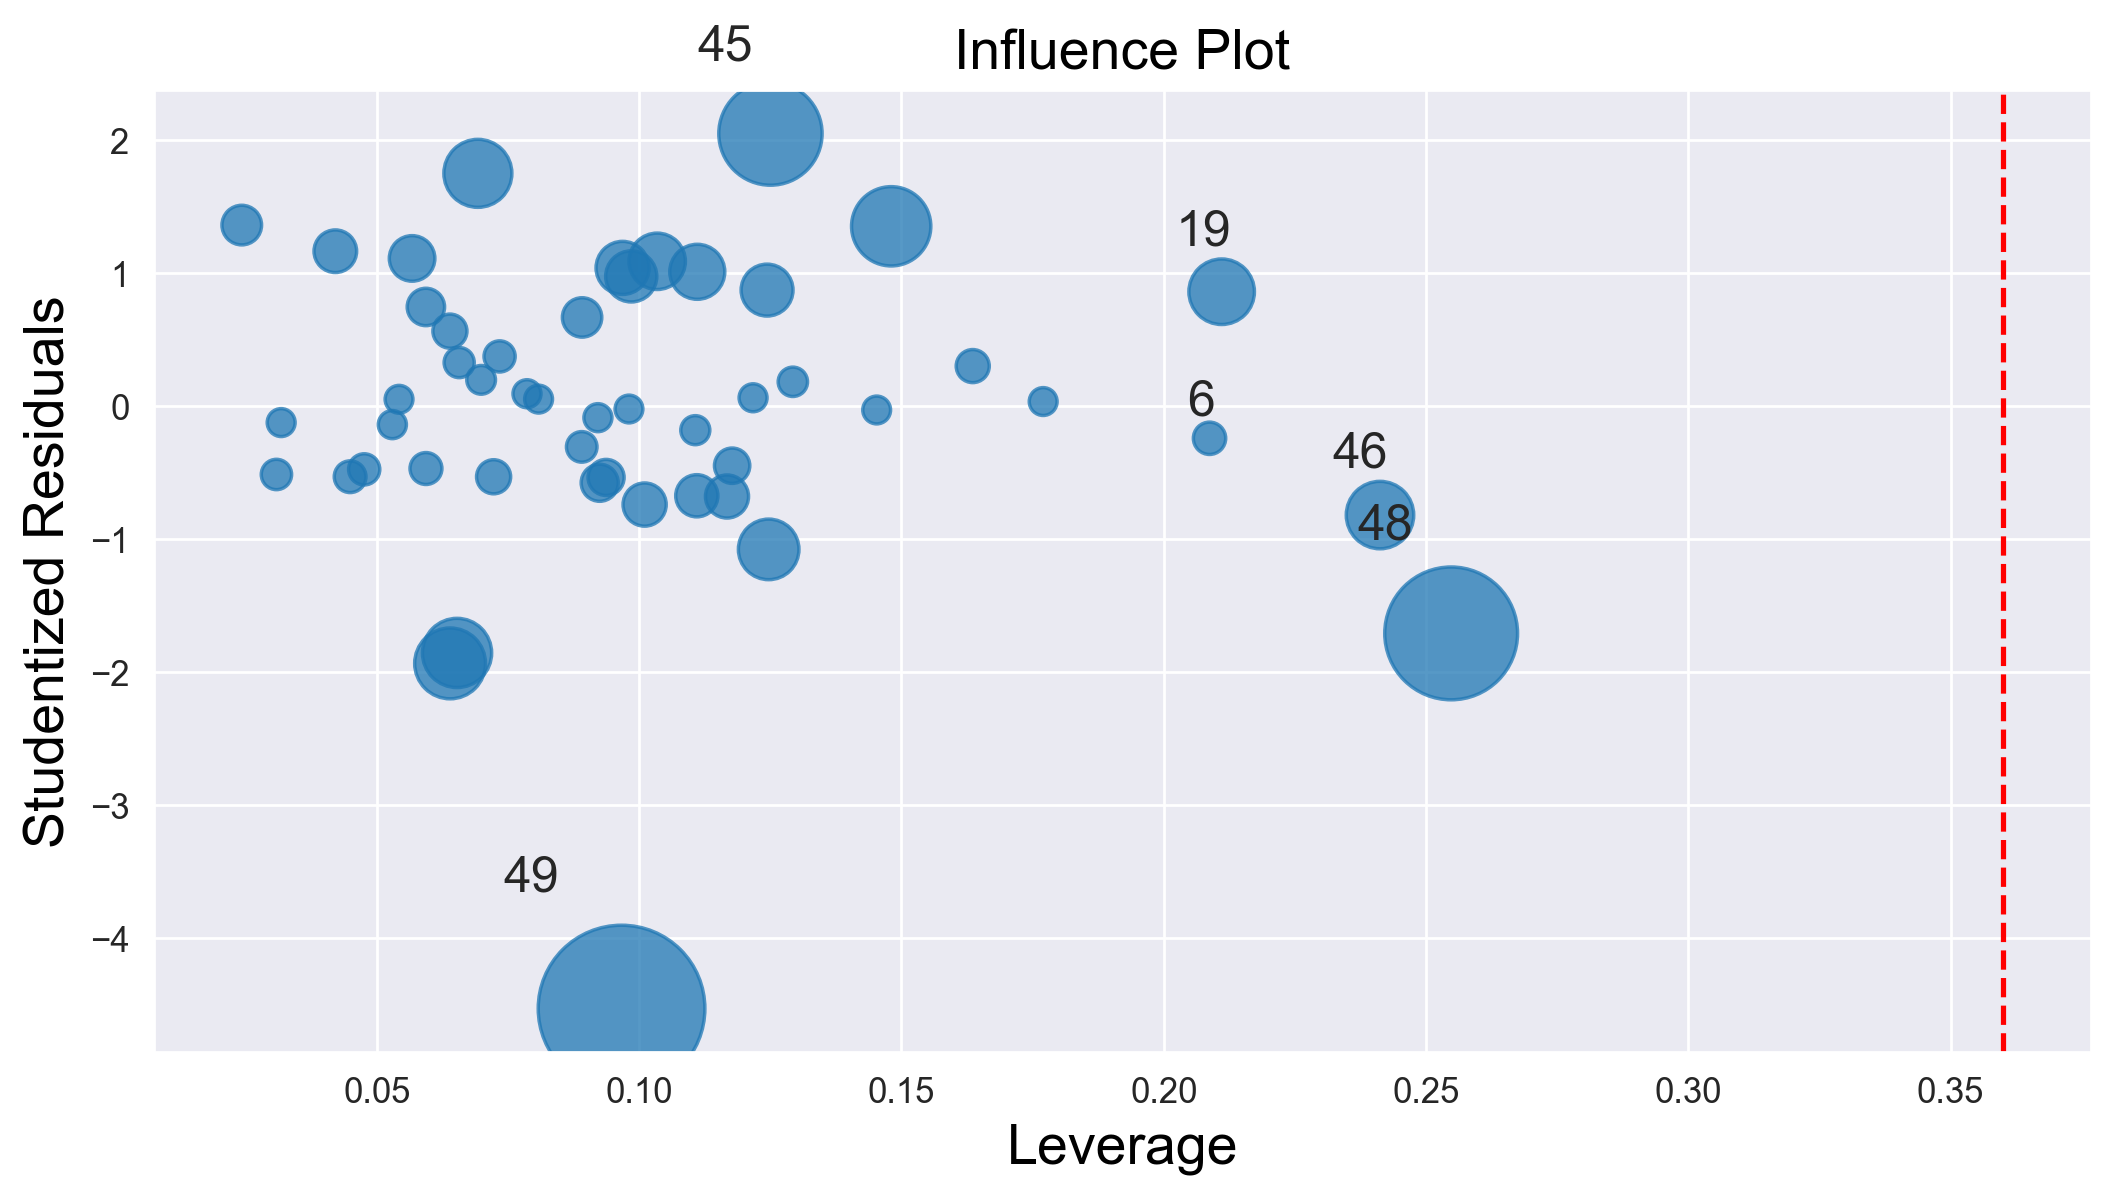

In [59]:
influence_plot(model)
plt.axvline(lv, linestyle = '--', color = 'red')

# Improving The Model

In [ ]:
df.drop(index=49,inplace=True)

In [62]:
df

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2.0,192261.83
1,162597.70,151377.59,443898.53,0.0,191792.06
2,153441.51,101145.55,407934.54,1.0,191050.39
3,144372.41,118671.85,383199.62,2.0,182901.99
4,142107.34,91391.77,366168.42,1.0,166187.94
5,131876.90,99814.71,362861.36,2.0,156991.12
6,134615.46,147198.87,127716.82,0.0,156122.51
7,130298.13,145530.06,323876.68,1.0,155752.60
8,120542.52,148718.95,311613.29,2.0,152211.77
9,123334.88,108679.17,304981.62,0.0,149759.96


In [ ]:
#reset the index

In [63]:
df.shape

(49, 5)

In [64]:
df.reset_index(inplace=True) ##gives original index

In [65]:
df

,index,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,0,165349.20,136897.80,471784.10,2.0,192261.83
1,1,162597.70,151377.59,443898.53,0.0,191792.06
2,2,153441.51,101145.55,407934.54,1.0,191050.39
3,3,144372.41,118671.85,383199.62,2.0,182901.99
4,4,142107.34,91391.77,366168.42,1.0,166187.94
5,5,131876.90,99814.71,362861.36,2.0,156991.12
6,6,134615.46,147198.87,127716.82,0.0,156122.51
7,7,130298.13,145530.06,323876.68,1.0,155752.60
8,8,120542.52,148718.95,311613.29,2.0,152211.77
9,9,123334.88,108679.17,304981.62,0.0,149759.96


In [66]:
df.drop(columns=['index'], inplace=True)

In [67]:
Final_Model= smf.ols('Profit~RandD_Spend+Administration+State',data=df).fit()
Final_Model.rsquared,Final_Model.aic

(0.9589084115933708, 1023.5240965971161)

# Predicting for new records

In [68]:
df.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2.0,192261.83
1,162597.70,151377.59,443898.53,0.0,191792.06
2,153441.51,101145.55,407934.54,1.0,191050.39
3,144372.41,118671.85,383199.62,2.0,182901.99
4,142107.34,91391.77,366168.42,1.0,166187.94


In [70]:
test = pd.DataFrame({
    'RandD_Spend' : [142107.34,144372.41,153441.51],
    'Administration' : [91391.77,118671.85,101145.55],
    'Marketing_Spend' : [366168.42,383199.62,407934.54],
    'State' :[1.0,2.0,1.0],
    
})

In [72]:
Final_Model.params

Intercept         57765.354938
RandD_Spend           0.836183
Administration       -0.046633
State              -986.189615
dtype: float64

In [73]:
test

,RandD_Spend,Administration,Marketing_Spend,State
0,142107.34,91391.77,366168.42,1.0
1,144372.41,118671.85,383199.62,2.0
2,153441.51,101145.55,407934.54,1.0


In [74]:
Final_Model.predict(test)

0    171345.003488
1    170980.662163
2    180367.592070
dtype: float64